# LogisticRegression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
%matplotlib inline
plt.style.use("seaborn-whitegrid")

## Logistic Regression always give categorical output
## Linear regression give numarical value 

# Iris Data Set using linear & logstic Comparision 

In [2]:
iris = sns.load_dataset('iris') # load dataset

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


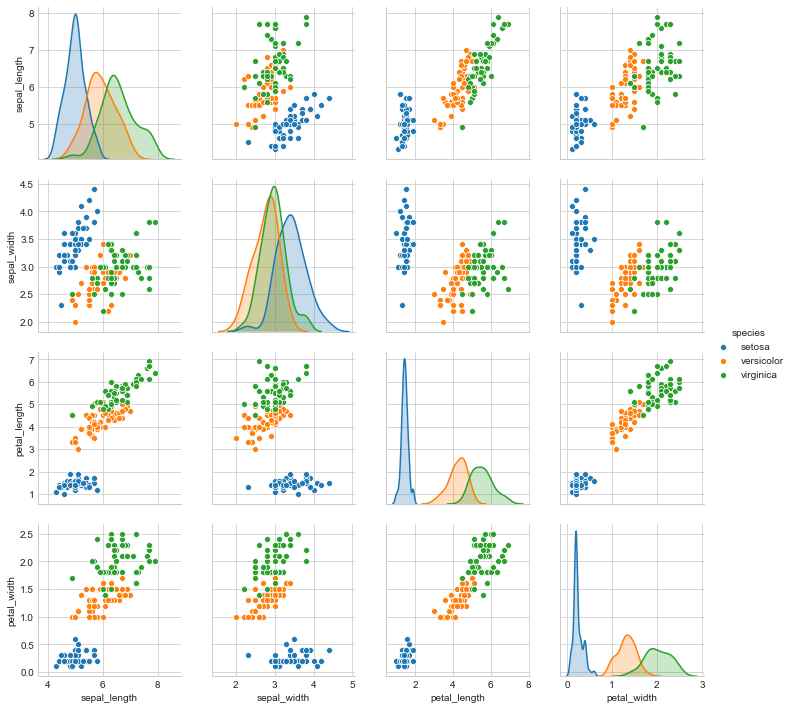

In [4]:
sns.pairplot(data=iris,hue='species')
plt.show()

In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
## setosa     -> 1
## versicolor -> 2
## virginica  -> 3

In [7]:
iris['species'] = iris['species'].map(
            { 'setosa':1, 'versicolor':2, 'virginica':3}
            )
iris['species'].head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [8]:
features,target = iris.drop('species',axis=1),iris['species']

In [9]:
features[:5], target[:5]

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2, 0    1
 1    1
 2    1
 3    1
 4    1
 Name: species, dtype: int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    features,target)

In [12]:
len(X_train)+len(X_test) == len(iris['species'])

True

In [13]:
len(X_train),len(X_test)

(112, 38)

### Creating model for linear and logistic both

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

lin = LinearRegression()
log = LogisticRegression()

lin.fit(X_train,y_train)
log.fit(X_train,y_train)

lin_pred = lin.predict(X_test)
log_pred = log.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Linear Regression r2 score : ",r2_score(y_test,lin_pred))
print("Logistic Regression r2 score : ",r2_score(y_test,log_pred))

print("Linear Regression MSE score : ",mean_squared_error(y_test,lin_pred))
print("Logistic Regression MSE score : ",mean_squared_error(y_test,log_pred))

Linear Regression r2 score :  0.9325068460942422
Logistic Regression r2 score :  0.9641509433962264
Linear Regression MSE score :  0.049544835969600666
Logistic Regression MSE score :  0.02631578947368421


C:\Users\RAhul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAhul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
## logistic give category -> 1,2,3
log.predict([[5.1,3.5 ,1.4,  0.2]])

array([1], dtype=int64)

In [17]:
## linear give value for this between 0 to 3
lin.predict([[5.1, 3.5, 1.4, 0.2]])

array([0.90944493])